# В данном ноутбуке представлен код дообучения YOLOv8n

In [20]:
from ultralytics import YOLO
import os
from roboflow import Roboflow
from IPython.display import display, Image

In [14]:
%cd D:\Detecting_and_rendering_people_2.0\tun_and_rec
HOME = os.getcwd()
parent_directory = os.path.dirname(HOME)

D:\Detecting_and_rendering_people_2.0\tun_and_rec


### (create model + train) Здесь подгружаем yolov8N (самую маленькую и быструю модель), её будет достаточно для поставленной задачи (и в целях экономии времени)

In [15]:
%cd {HOME}
model = YOLO("yolov8n.pt")

D:\Detecting_and_rendering_people_2.0\tun_and_rec


### В качестве гиперпараметров я выбрал базовые, их должно хватить, но из-за их большого количества, я предполагаю, что в будущем их можно потюнить и выбрать наилучшие

In [17]:
model.train(data="../pershel2.yaml",
            task='detect',
            imgsz=640,
            epochs=10,
            batch=12,
            mode='train',
            name='yolov8n_v1_train')

New https://pypi.org/project/ultralytics/8.2.60 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.11.5 torch-2.3.1+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../pershel2.yaml, epochs=10, patience=50, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=Fal

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002421DBA4910>
fitness: 0.37913798721354225
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.46808,     0.45107,     0.25847,     0.20222,     0.25247,     0.38235,     0.35375,     0.41321,     0.40545,     0.25958])
names: {0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat', 3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone', 7: 'Safety Vest', 8: 'machinery', 9: 'vehicle'}
plot: True
results_dict: {'metrics/precision(B)': 0.8062992130316516, 'metrics/recall(B)': 0.6187623862803295, 'metrics/mAP50(B)': 0.6893702239613869, 'metrics/mAP50-95(B)': 0.3446677386860039, 'fitness': 0.37913798721354225}
save_dir: WindowsPath('D:/Detecting_and_rendering_people_2.0/runs/detect/yolov8n_v1_train2

### В результате обучения на 10 эпохах mAP50 = 0.689, что достаточно плохо и следовало бы увеличить кол-во эпох, потому что по обучению видно, что результат улучшается, но я использовал GPU при обучении, из-за чего потребовалось 2.5ч на 10 эпох. При использовании CPU скорость обучения ускориться и можно смело брать больше эпох (20-30)

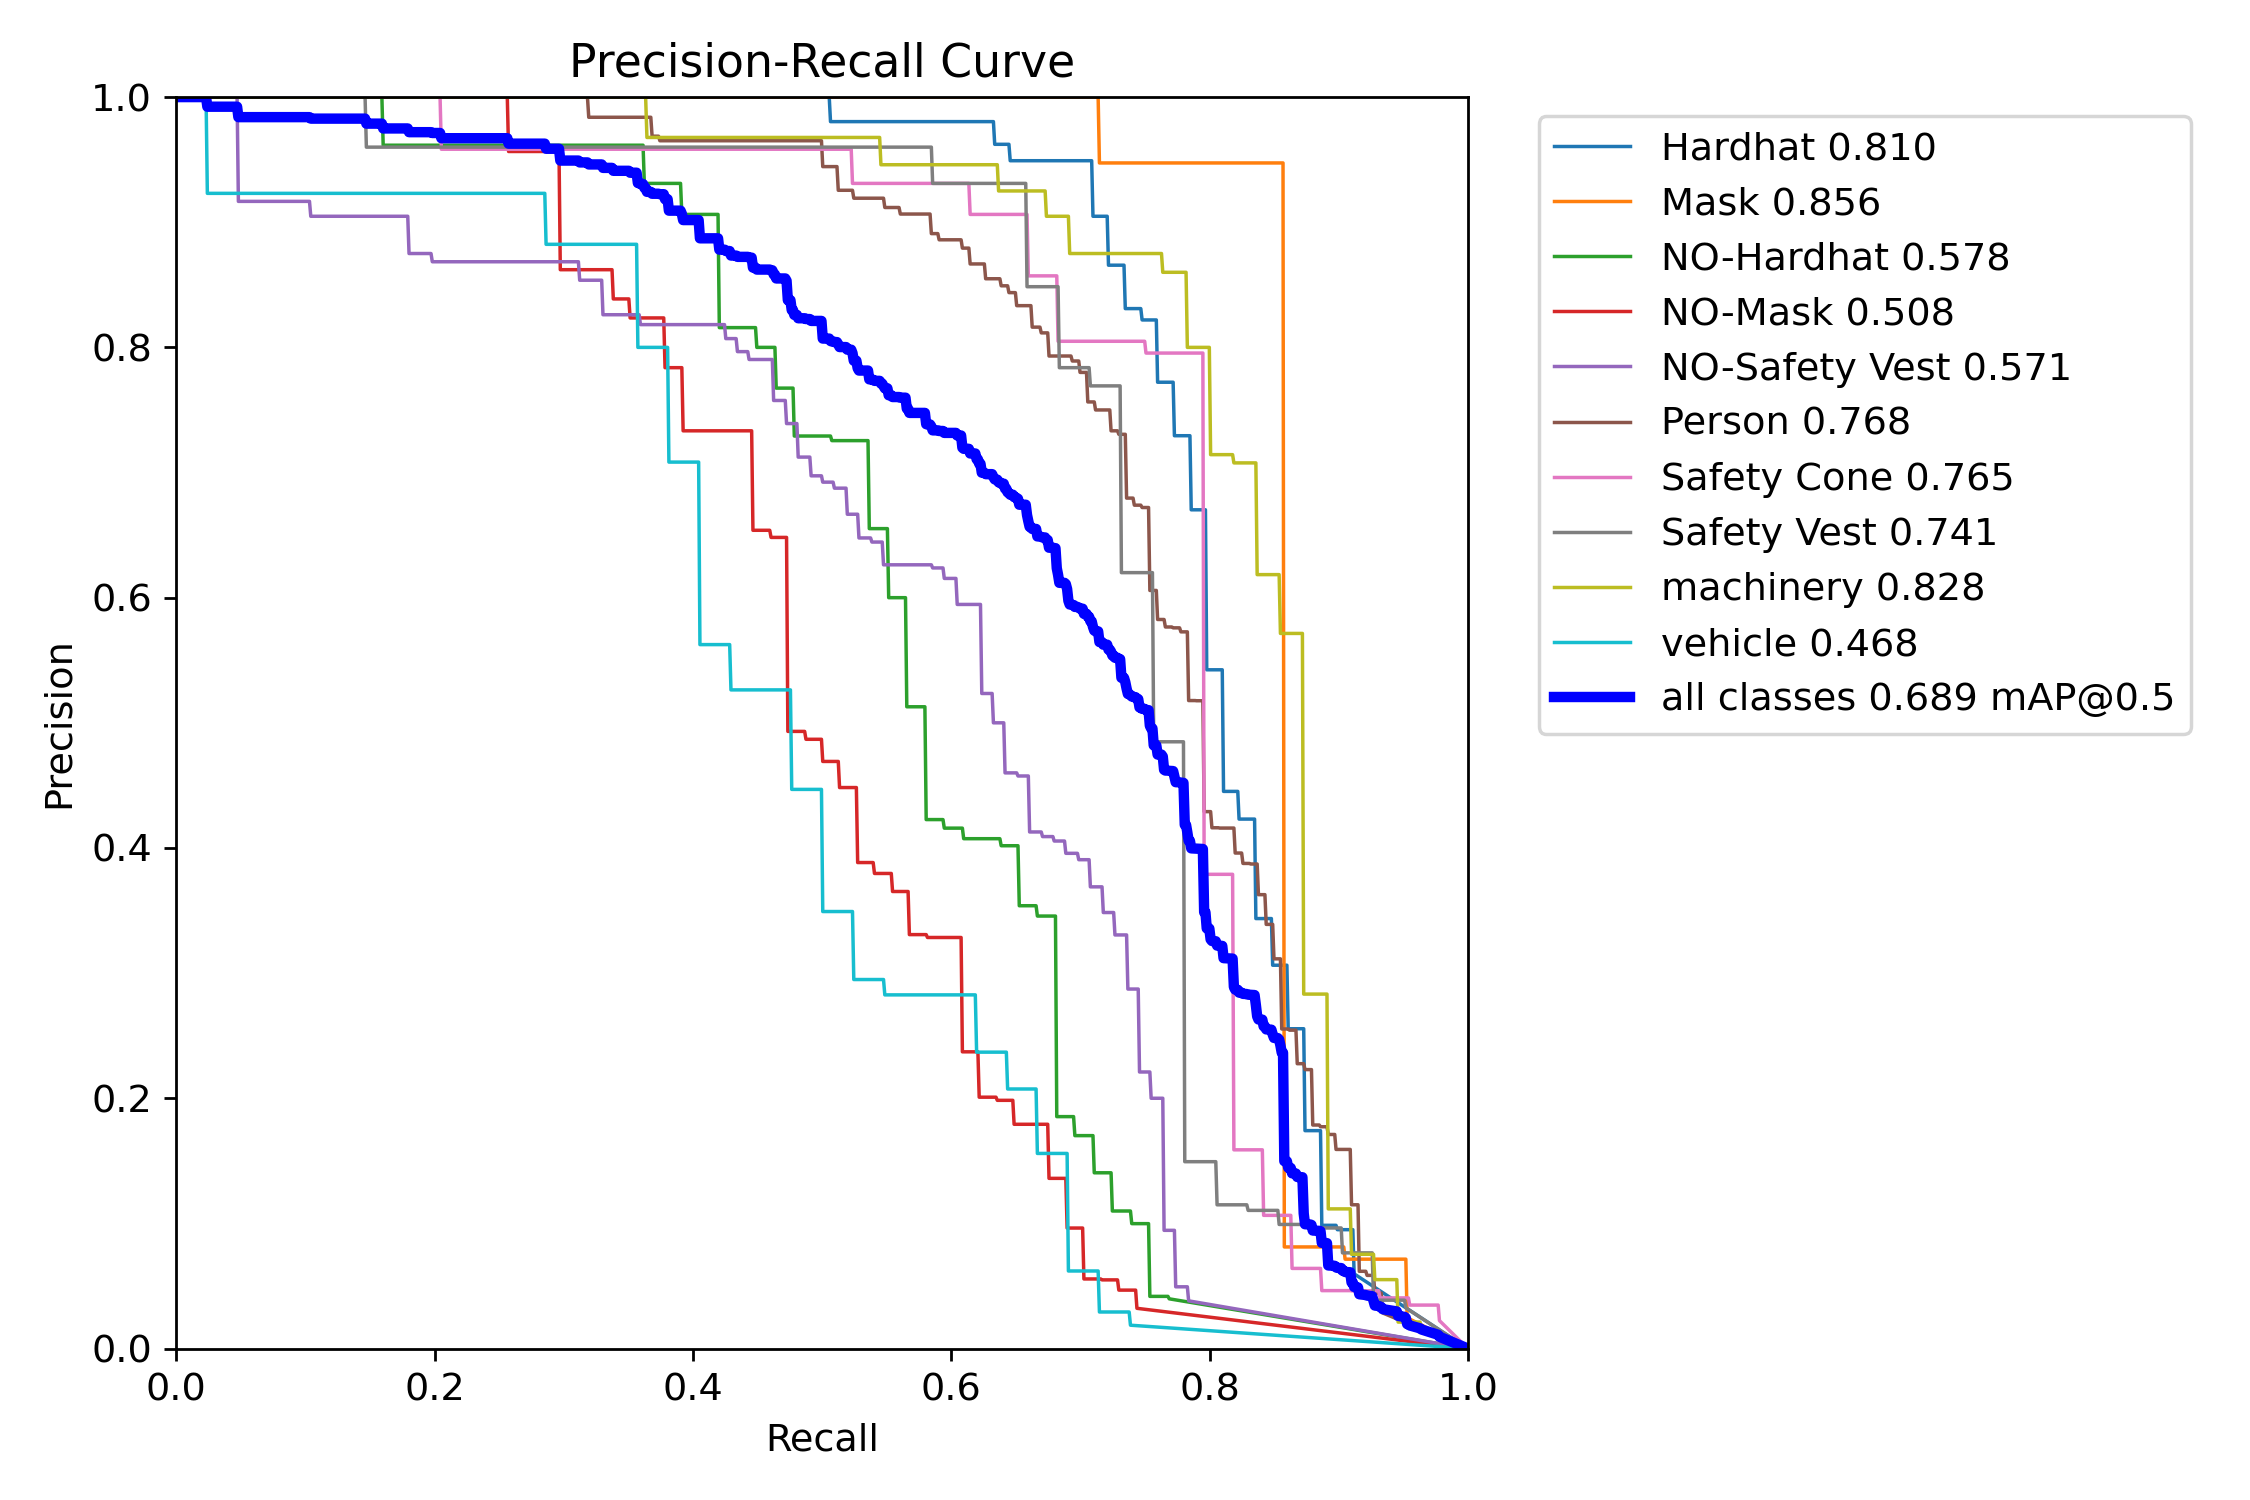

In [21]:
Image(filename=f'{parent_directory}/runs/detect/yolov8n_v1_train2/PR_curve.png', width=800)

### По матрице ошибок видно, что доля отрицательно предсказанных классов минимальна (не выше 0.05), что хорошо

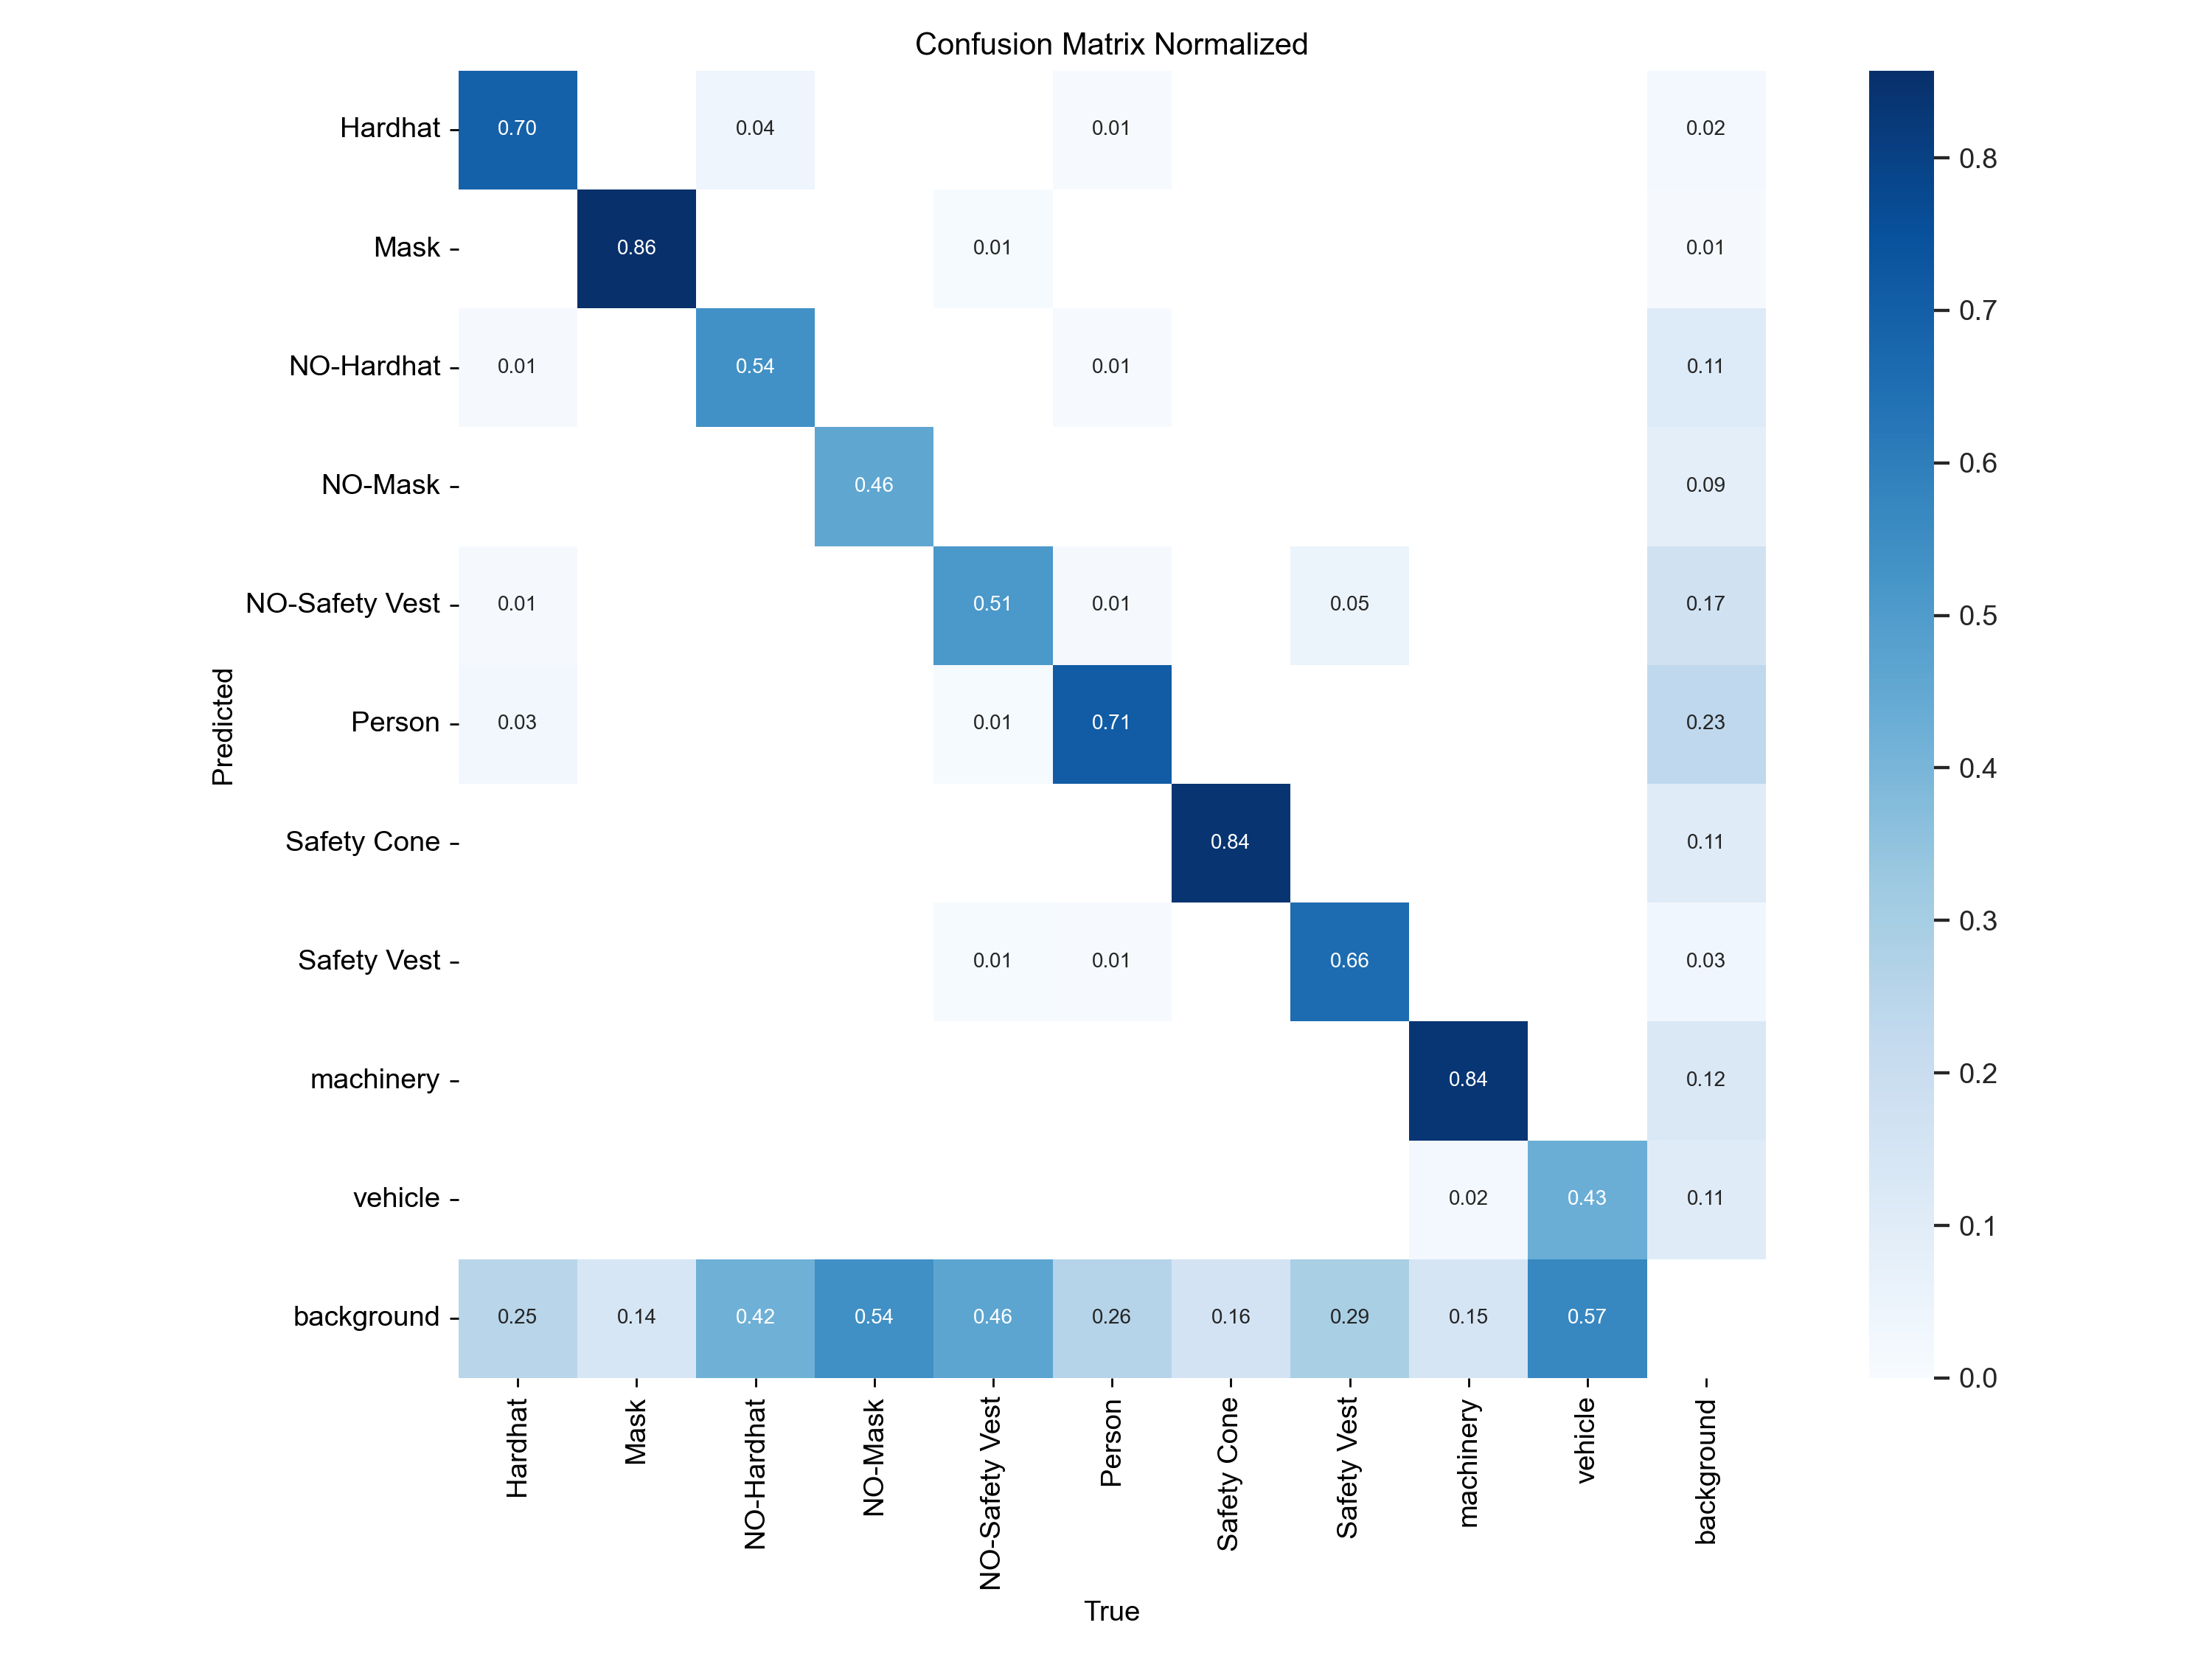

In [22]:
Image(filename=f'{parent_directory}/runs/detect/yolov8n_v1_train2/confusion_matrix_normalized.png', width=800)

### Проверим модель на test сете

In [44]:
model = YOLO('../runs/detect/yolov8n_v1_train2/weights/best.pt')

result = model.predict(
    source="D:/Detecting_and_rendering_people_2.0/tun_and_rec/datasets/saf_h_d/css-data/test/images",
    save = True
)


image 1/82 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\saf_h_d\css-data\test\images\-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 1 NO-Safety Vest, 3 Persons, 1 machinery, 100.6ms
image 2/82 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\saf_h_d\css-data\test\images\000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 1 NO-Mask, 1 Person, 1 machinery, 100.9ms
image 3/82 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\saf_h_d\css-data\test\images\002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 2 Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 2 Persons, 98.9ms
image 4/82 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\saf_h_d\css-data\test\images\003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 NO-Safety Vest, 1 Person, 1 Safety Cone, 91.2ms
image 5/82 D:\Detecting_and_rendering_people_2.0\tun_and_rec\datasets\saf_h_d\css-data\test\images\004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053

### Выведу пару изображений. Я понимаю, что на них используются больше классов чем необходимо, но при итоговой детекции, я отберу только нужные классы = Person и Hardhat

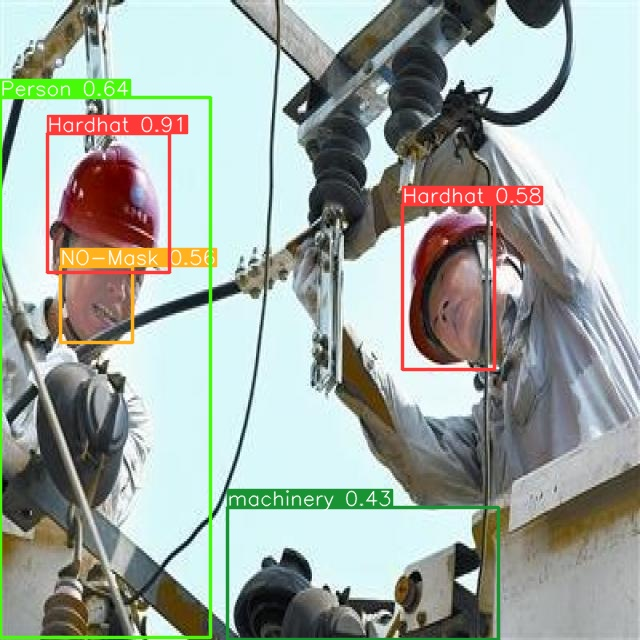

In [45]:
Image(filename=f'{parent_directory}/runs/detect/predict3/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg', width=400)


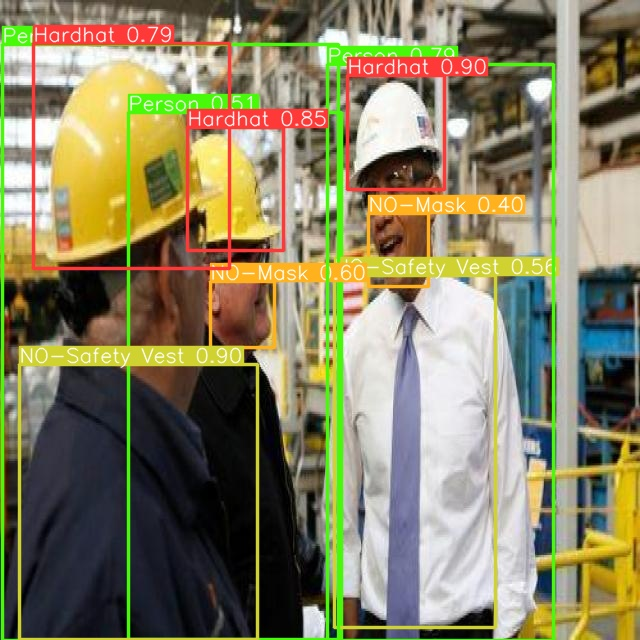

In [46]:
Image(filename=f'{parent_directory}/runs/detect/predict3/004763_jpg.rf.46484e6ca73caeaa9de45822cf1085a9.jpg', width=400)

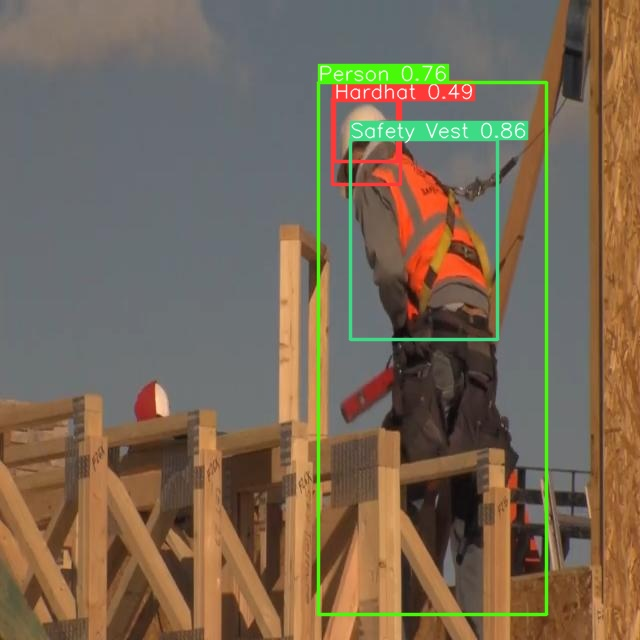

In [47]:
Image(filename=f'{parent_directory}/runs/detect/predict3/youtube-186_jpg.rf.1f1d93447d4be3233c22c4ce9f6e0601.jpg', width=400)